<a href="https://colab.research.google.com/github/mansipatel2508/Image-Forgery-Detection-CNN-vs-Transfer-Learning-Comparison/blob/master/Image_Forgery_Detection_CNN_vs_Transfer_Learning_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Forgery Detection CNN vs Transfer Learning Comparison
# Problem Statement
In the field of Digital Forensics, it is important to know the authenticity or originality of an image, this project focuses on predicting the given image is pristine or fake/manipulated/edited/photoshoped.

Image Preprocessing | Image Handling | Data visualization | Feature extraction & engineering | Transfer Learning | Deep CNN | Binary Classification | Model Evaluation & Comparison | Conclusion & Future scope | OpenCV

The project definition and dataset is the part of first IEEE Image Forensics challange launched in 2013 and to observe the experimental result of deep CNN network vs Transfer Learning which used VGG16 as trained model.

The challange has 2 phases, dealing with the first phase in this project to detect if its real or fake image, binary classification problem.

The project learnings
* Image Handling and Processing
* Using Image data generator
* Observering the performaces CNN vs Transfer Learning
* Feature engineering.extraction on images
* Otsu’s thresholding on images
* Converting greyscale images to binary
* Image normalization

Libraries Exposure
* OpenCV : cv2
* Image Data Generator
* Pylab : rcParams
* imageio : imread
* pickle

# Dataset
* Dataset has 2 folders containing 900 fake images and 1050 pristine images
* Used the train dataset which arounf 2 GB and splited train-test from that (Processor Contraint)
* Online:  http://ifc.recod.ic.unicamp.br/fc.website/index.py?sec=0


#Understanding the data

* Pristine Images : 1050

* Fake Images : 900

>  * Fake images : 450

> * Masks : 450




In [0]:
print("fake images",len(fakeimage))
print("pristine images",len(pristineimage))

fake images 900
pristine images 1050


In [0]:
fakeimage[0:10]

['dataset-dist/phase-01/training/fake\\010543abfbd0db1e9aa1b24604336e0c.mask.png',
 'dataset-dist/phase-01/training/fake\\010543abfbd0db1e9aa1b24604336e0c.png',
 'dataset-dist/phase-01/training/fake\\022354380a1a17ff49226c9eae21a11f.mask.png',
 'dataset-dist/phase-01/training/fake\\022354380a1a17ff49226c9eae21a11f.png',
 'dataset-dist/phase-01/training/fake\\0294345b3b2324b195cb3b30e91d7678.mask.png',
 'dataset-dist/phase-01/training/fake\\0294345b3b2324b195cb3b30e91d7678.png',
 'dataset-dist/phase-01/training/fake\\0363353570f16ff0a73aa0a03a7795b8.mask.png',
 'dataset-dist/phase-01/training/fake\\0363353570f16ff0a73aa0a03a7795b8.png',
 'dataset-dist/phase-01/training/fake\\0830004e471e511458600f0763ce19f3.mask.png',
 'dataset-dist/phase-01/training/fake\\0830004e471e511458600f0763ce19f3.png']

In [0]:
pristineimage[0:10]

['dataset-dist/phase-01/training/pristine\\0001d52e2fd94f30c2bca0449763a752.png',
 'dataset-dist/phase-01/training/pristine\\000bc3906100ede4b1374cea075adedb.png',
 'dataset-dist/phase-01/training/pristine\\002e23c036a05de656242f5ce6ab2e15.png',
 'dataset-dist/phase-01/training/pristine\\003f2d6e572e2587ffa809f78ff4a5c4.png',
 'dataset-dist/phase-01/training/pristine\\00d56bffe2d757a4e4625cc2d0bd0de9.png',
 'dataset-dist/phase-01/training/pristine\\00dd93f9e4af553929e54e66c2a3186e.png',
 'dataset-dist/phase-01/training/pristine\\00dffa8cb9db22527454bfa3c03b484b.png',
 'dataset-dist/phase-01/training/pristine\\00e079b66d9e9f99892bbb81d9d6cd57.png',
 'dataset-dist/phase-01/training/pristine\\00e3659be9c1fec47c739f79252840e3.png',
 'dataset-dist/phase-01/training/pristine\\00ec0ffe0cd029ad4551680484a007d7.png']

## Mask for the fake image
* Indentify where exactly the image is forgerized/edited
* Seperated the masks from the fake images

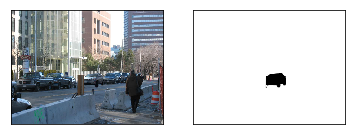

In [0]:
display(x_train_fake_images[1],x_train_masks[1])

## Plotting the Depth of the Images
* The images with various channel/depth
* Need to convert all the images to the one majority image channel or remove those.

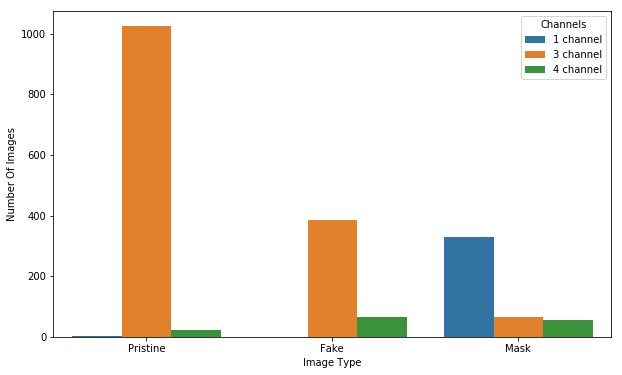

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import seaborn as sns
x = ['Pristine',
     'Fake',
     'Mask']


y = [pristine3,0, mask3]
z=[pristine2,fake2,mask2]
k=[pristine1,fake1,mask1]
df = pd.DataFrame(zip(x*3, ["1 channel"]*3+["3 channel"]*3+["4 channel"]*3, y+z+k), columns=["Image Type", "Channels", "Number Of Images"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Image Type", hue="Channels", y="Number Of Images", data=df)
plt.show()

## Shape conflict
* Fake and mask of the fake images were in different shape 
* Reshape the mask as fake

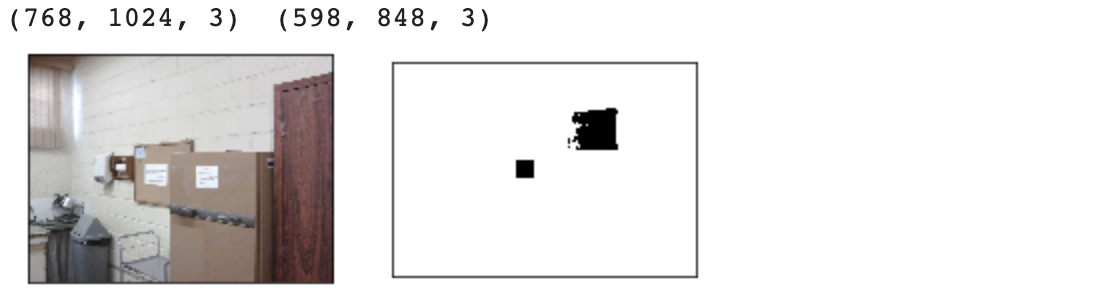

In [3]:
from IPython.display import Image,display
display(Image('/content/shapecon.png',width=1000, height=300))

## Final Data
* Fake Images : 450
> * Converted to 3 channel depth
*Pristine Images : 1025
>* Removed 1 & 4 channel depth
* Masks : 450
>*Converted to 1 channel depth (grayscale)

# Data Sampling
* Fake images : 450
* Pristine images : 450

# Train -Test Split
* Train - Test : 70% - 30%
* Set ‘Stratify’ parameter to labels


# Model Evaluation

## Deep CNN

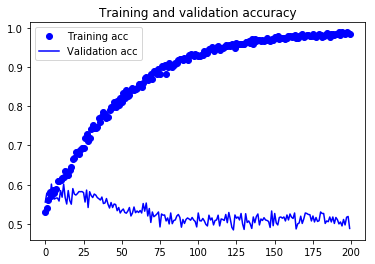

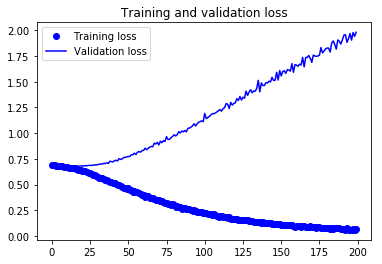

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

#history=load_model(image_path+'keras_cnn_model.hdf5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Precision score: 0.5396451620941417
Recall score: 0.5396825396825397
F1 score: 0.5395278327920814
[[53 42]
 [45 49]]
Plot of Confusion Matrix


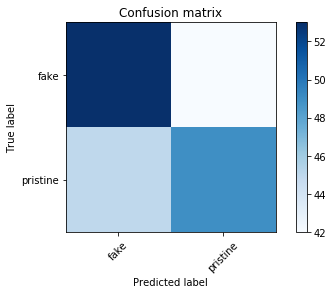

              precision    recall  f1-score   support

           0       0.54      0.56      0.55        95
           1       0.54      0.52      0.53        94

   micro avg       0.54      0.54      0.54       189
   macro avg       0.54      0.54      0.54       189
weighted avg       0.54      0.54      0.54       189



In [0]:
y_pred_cnn = cnn_model.predict_classes(x_t)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['fake','pristine'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

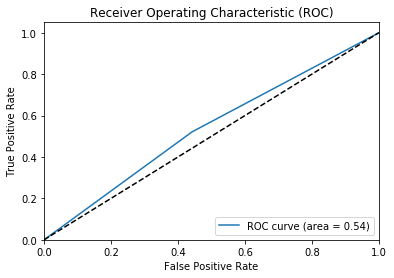

In [0]:
plot_roc(y_pred_cnn,y_cv)

## Transfer Learning
* VGG 16 (17 layers) + Top layer ( Flatten + Dense + Dense )

In [0]:
from sklearn import metrics
pred_transfer
score_lr2 = metrics.f1_score(y_cv, pred_transfer, average= "weighted")
print("F1 score: {}".format(score_lr2))

F1 score: 0.5692329345531316


Precision score: 0.5724900385394212
Recall score: 0.5714285714285714
F1 score: 0.5692329345531316
[[61 34]
 [47 47]]
Plot of Confusion Matrix


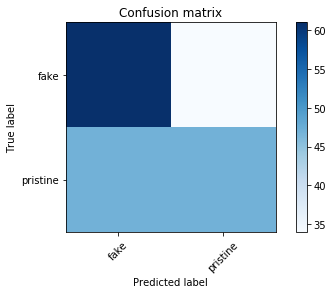

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        95
           1       0.58      0.50      0.54        94

   micro avg       0.57      0.57      0.57       189
   macro avg       0.57      0.57      0.57       189
weighted avg       0.57      0.57      0.57       189



In [0]:
y_pred = loaded_model.predict_classes(x_t)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred, average= "weighted")
print("Recall score: {}".format(score))
score_lr2 = metrics.f1_score(y_cv, y_pred, average= "weighted")
print("F1 score: {}".format(score_lr2))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['fake','pristine'])
plt.show()
print(classification_report(y_cv,y_pred))

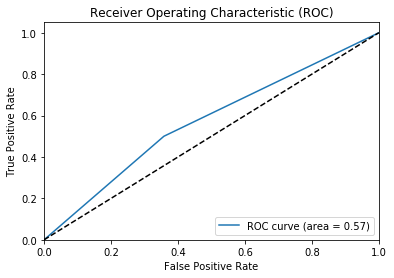

In [0]:
plot_roc(y_pred,y_cv)

#Comparison

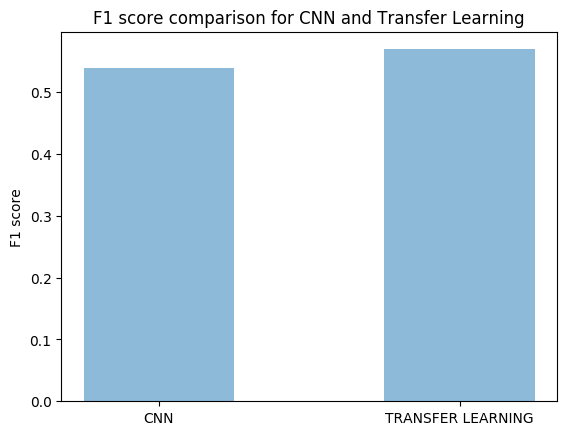

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('CNN', 'TRANSFER LEARNING')
y_pos = np.arange(len(objects))
performance = [0.5395,0.5692]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score comparison for CNN and Transfer Learning')
 
plt.show()

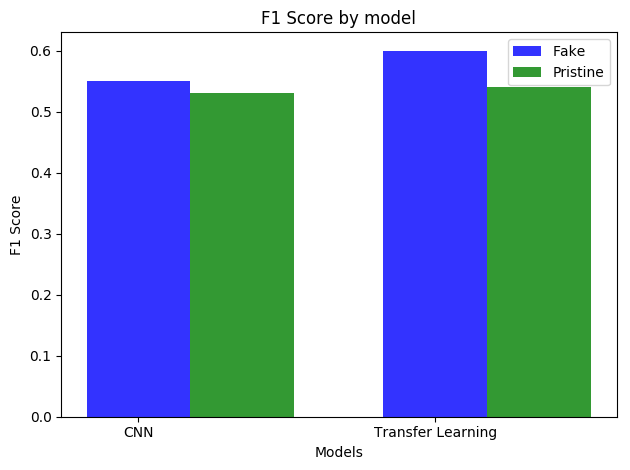

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.55,0.60 )
p = (0.53, 0.54)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Fake')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='Pristine')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score by model')
plt.xticks(index , ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

# Test 5 images
* Labels : 1 - pristine and 0 - fake


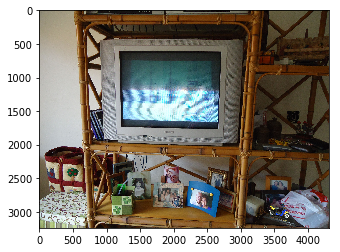

In [0]:
plt.imshow(img1) # actual - 0 , predicted - 0

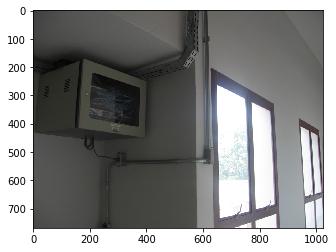

In [0]:
plt.imshow(img2) # actual - 1 , predicted - 0

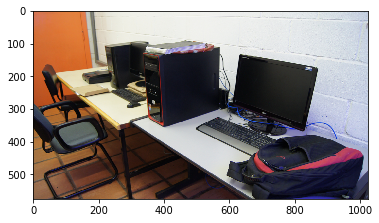

In [0]:
plt.imshow(img3) # actual - 1 , predicted - 1

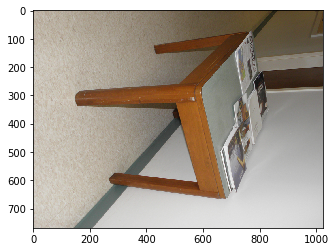

In [0]:
plt.imshow(img4) # actual - 1 , predicted - 1

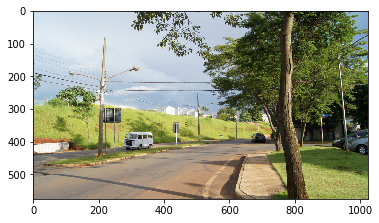

In [0]:
plt.imshow(img5) # actual - 1 , predicted - 0

# Feature Extraction for Performance boost

* Sampled the fake image by using it’s mask values
>* Masks converted into binary so that the masks' boundary would be more prominent and distinctive
>* Sobel kernel concept was implemented to make samples from fake such that 60% in the image is non-edited while 40% is edited
* For pristine image randomly made samples

>* Sample size : 64 x 64 x 3

# Data Volume
* 50,000 fake samples
* 50,000 pristine samples

A fake sample example is as follows

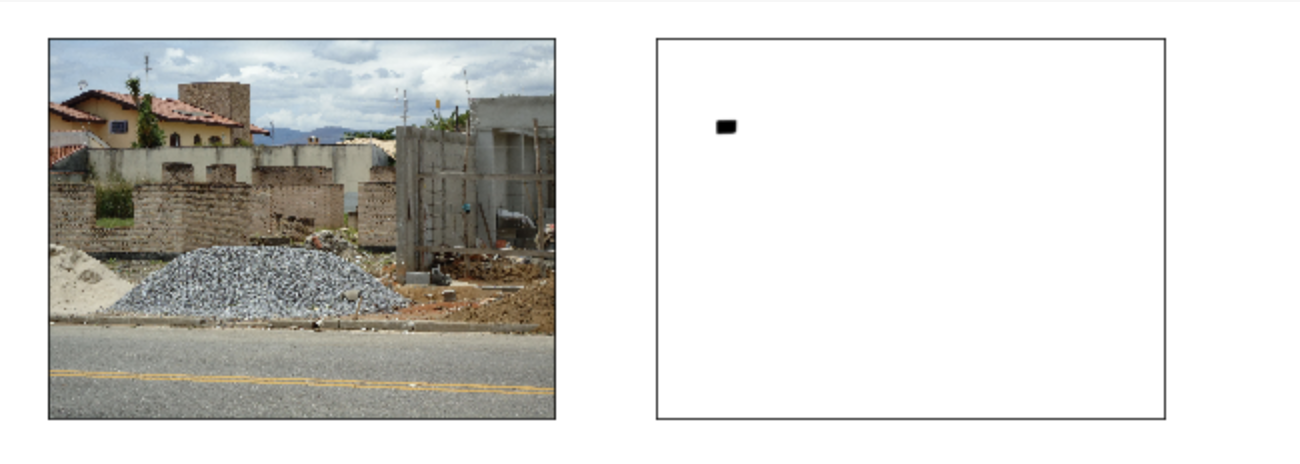

In [6]:
from IPython.display import Image,display
display(Image('/content/f1.png',width=900, height=300))

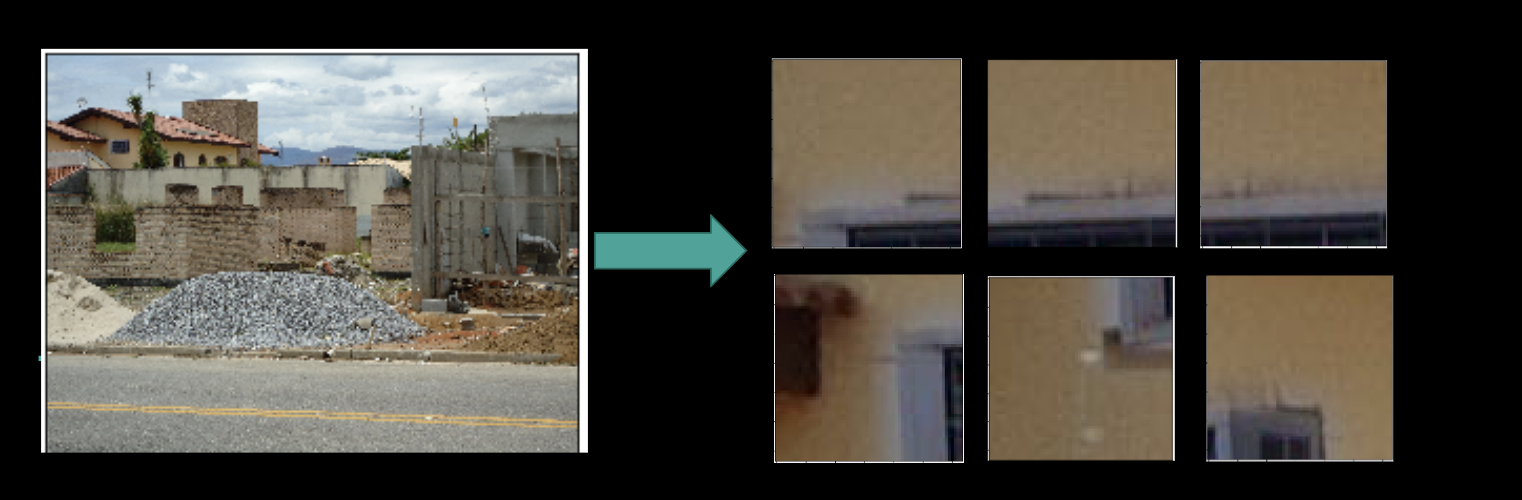

In [7]:
from IPython.display import Image,display
display(Image('/content/f2.png',width=900, height=300))

#Model Evaluation

## CNN

Precision score: 0.6701453926873258
Recall score: 0.6701333333333334
F1 score: 0.6700775817917359
[[4894 2546]
 [2402 5158]]
Plot of Confusion Matrix


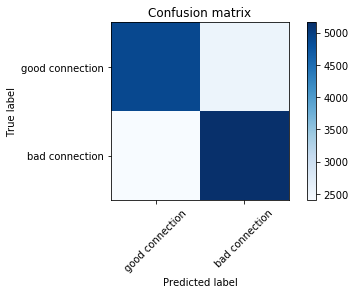

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      7440
           1       0.67      0.68      0.68      7560

   micro avg       0.67      0.67      0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000



In [0]:
y_pred_cnn = cnn_model.predict_classes(x_cv)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

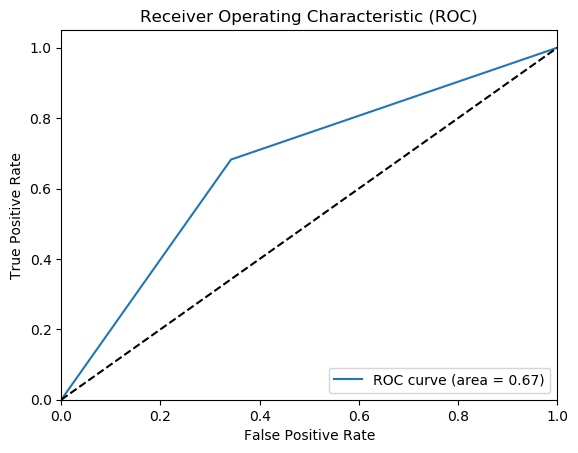

In [0]:
plot_roc(y_pred_cnn,y_cv)

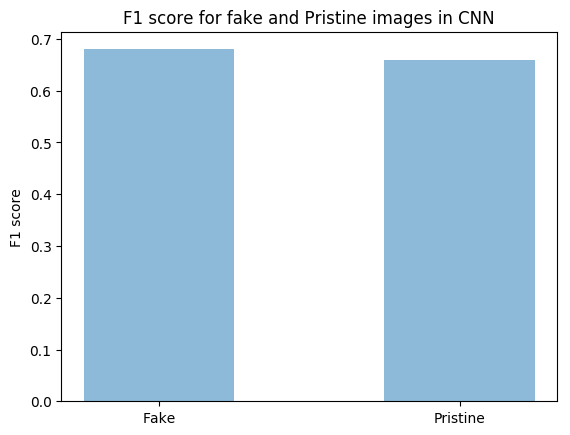

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Fake', 'Pristine')
y_pos = np.arange(len(objects))
performance = [0.68,0.66]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score for fake and Pristine images in CNN')
 
plt.show()

## Transfer Learning

Precision score: 0.7695344242598015
Recall score: 0.7694666666666666
F1 score: 0.7694690273340432
[[5759 1681]
 [1777 5783]]
Plot of Confusion Matrix


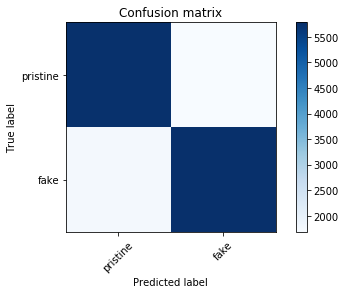

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      7440
           1       0.77      0.76      0.77      7560

   micro avg       0.77      0.77      0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



In [0]:
y_pred_cnn = loaded_model.predict_classes(x_cv)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['pristine','fake'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

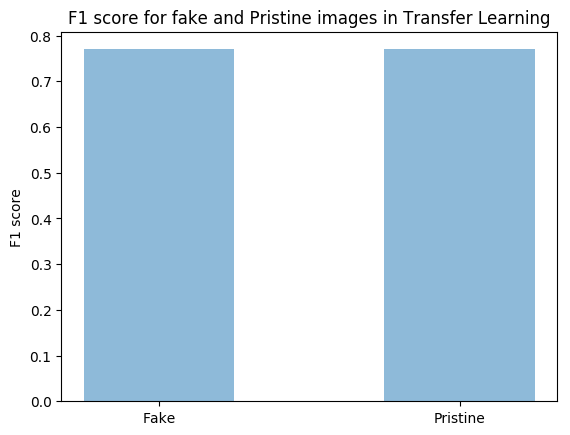

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Fake', 'Pristine')
y_pos = np.arange(len(objects))
performance = [0.77,0.77]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score for fake and Pristine images in Transfer Learning')
 
plt.show()

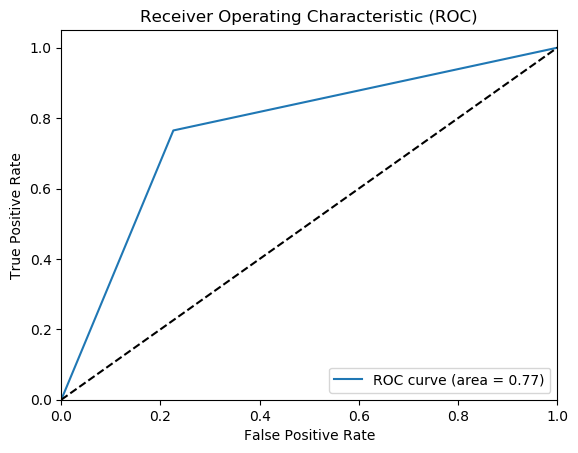

In [0]:
plot_roc(y_pred_cnn,y_cv)

#Model Comparison

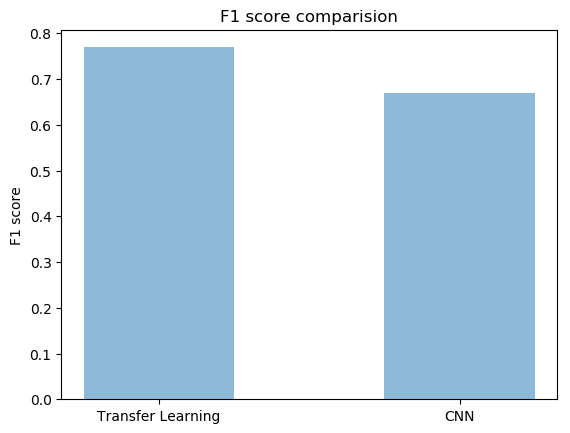

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Transfer Learning', 'CNN')
y_pos = np.arange(len(objects))
performance = [score_lr1,score_lr2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score comparision')
 
plt.show()

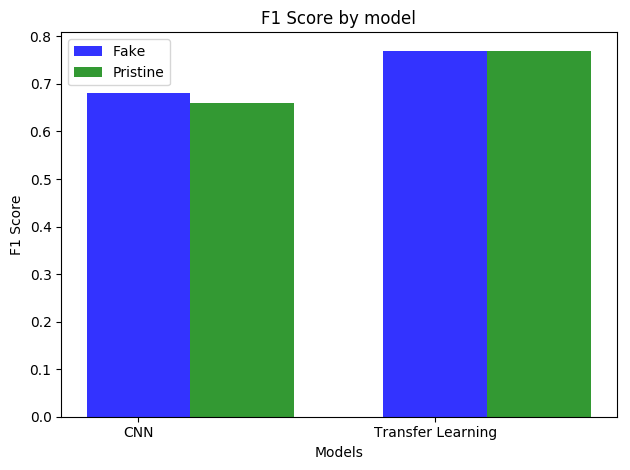

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.68,0.77 )
p = (0.66, 0.77)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Fake')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='Pristine')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score by model')
plt.xticks(index, ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

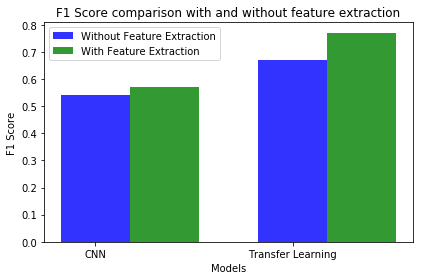

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.5395,0.67)
p = (0.5692, 0.77)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Without Feature Extraction')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='With Feature Extraction')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score comparison with and without feature extraction')
plt.xticks(index, ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

#Test 3 new images
* Labels : 1 - pristine and 0 - fake


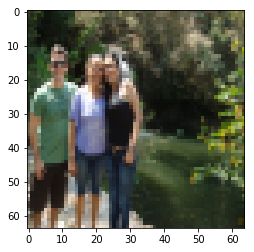

In [0]:
plt.imshow(x_test[0]) # Predicted - 0 Actual - 1

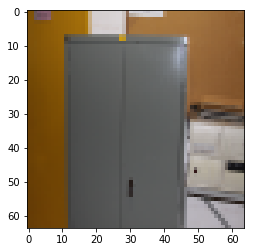

In [0]:
plt.imshow(x_test[3]) # Predicted - 0 Actual - 0

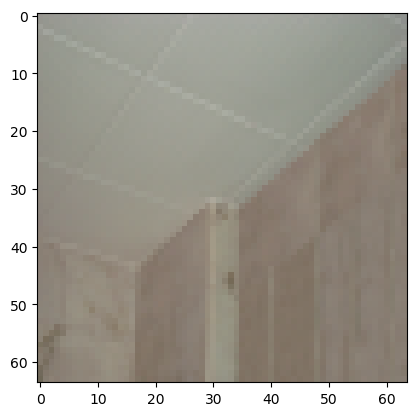

In [0]:
plt.imshow(x_test[46]) # Predicted - 1 Actual - 1

In [0]:
Mini Project5

Mansi Patel

May 10, 2019

Prof: H.Chen

CSC 215 